confusion matrix ,
accuracy ,
misclassfication rate ,
TPR ,
FPR ,
TNR ,
FNR ,
precision ,
f score 

In [55]:
import pandas as pd
import numpy as np
import sklearn as sk
from matplotlib import pyplot
import string

In [56]:
df = pd.read_csv("sms_spam.csv")
print(df.shape)
df.head()

(5559, 2)


,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...


In [57]:
#Removing Punctuation
text = []
for i in range(len(df.text)):
    s = df.text[i]
    exclude = set(string.punctuation)
    s = ''.join(ch for ch in s if ch not in exclude)
    text.append(s)
df.text = text
df.head()

,type,text
0,ham,Hope you are having a good week Just checking in
1,ham,Kgive back my thanks
2,ham,Am also doing in cbe only But have to pay
3,spam,complimentary 4 STAR Ibiza Holiday or £10000 c...
4,spam,okmail Dear Dave this is your final notice to ...


In [58]:
#Removing Numbers/Digits
text = []
for i in range(len(df.text)):
    s = df.text[i]
    s = ''.join([i for i in s if not i.isdigit()])
    text.append(s)
df.text = text
df.head()

,type,text
0,ham,Hope you are having a good week Just checking in
1,ham,Kgive back my thanks
2,ham,Am also doing in cbe only But have to pay
3,spam,complimentary STAR Ibiza Holiday or £ cash ne...
4,spam,okmail Dear Dave this is your final notice to ...


In [59]:
#Removing Stops Words

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
  
text = []
for i in range(len(df.text)):
    s = df.text[i]
    #print(s)
    stop_words = set(stopwords.words('english')) 
    word_tokens = s.split(' ')
    #print(word_tokens)
    s = ' '.join([i for i in word_tokens if i not in stop_words])
    #print(s)
    text.append(s)
df.text = text
df.head()

,type,text
0,ham,Hope good week Just checking
1,ham,Kgive back thanks
2,ham,Am also cbe But pay
3,spam,complimentary STAR Ibiza Holiday £ cash needs...
4,spam,okmail Dear Dave final notice collect Tenerif...


In [66]:
# Find unique words
UniWords = []
for i in df.text:
    i = i.split(' ')
    for t in i:
        if t not in UniWords:
            UniWords.append(t)
UniWords.remove('')
print(len(UniWords))


10611


In [127]:
# One Hot Encoding 
ndf = pd.DataFrame(columns=UniWords)
for i in range(len(df)):
    s = df.text[i]
    s = s.split(' ')
    while '' in s:
        s.remove('')
    t = [0 for i in range(len(UniWords))]
    for j in s:
        index = UniWords.index(j)
        t[index] = s.count(j)
    ndf = ndf.append(pd.Series(t, index=ndf.columns),ignore_index=True)
    print('Done')

In [128]:
ndf.to_csv('Preprocessed_Spma_Ham.csv', sep=',', encoding='utf-8')

In [134]:
ndf['Spam'] = df.type

In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

X = ndf.iloc[:,ndf.columns!='Spam']
y = ndf.iloc[:,ndf.columns=='Spam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()

logreg.fit(X_train, y_train)
print(logreg.intercept_)
print(logreg.coef_)

[-3.69833781]
[[-0.22970515 -0.65065681  0.34442549 ...  0.          0.
   0.        ]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [149]:
y_pred = logreg.predict(X_test)

print("Real Observed")
print(y_test.Spam.value_counts())

print("Observed by our Model")
pd.Series(y_pred).value_counts()

Real Observed
ham     1464
spam     204
Name: Spam, dtype: int64
Observed by our Model


ham     1500
spam     168
dtype: int64

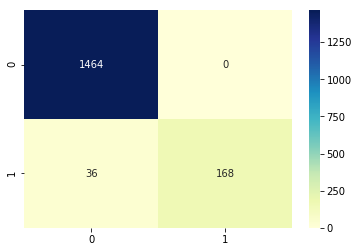

In [150]:
import seaborn as sns

from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test,y_pred)
sns.heatmap(conf,annot=True,fmt='g',cmap='YlGnBu')

In [157]:
from sklearn import metrics 

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#print("Precision:",metrics.precision_score(y_test, y_pred))
#print("Recall:",metrics.recall_score(y_test, y_pred))
#print("F1 Score:",metrics.f1_score(y_test, y_pred))

print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.9784172661870504
             precision    recall  f1-score   support

        ham       0.98      1.00      0.99      1464
       spam       1.00      0.82      0.90       204

avg / total       0.98      0.98      0.98      1668

